In [1]:
from functions_for_all_nutrients import *

In [2]:
username = !whoami
username

['alibow']

In [3]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = [2,3,4,5]
sex_ids = [1,2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]

In [4]:
nutrients = ['vitamin a','zinc','iron','folic acid']
vehicles = ['oil','wheat flour','maize flour', 'industry oil']

In [5]:
coverage_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/lsff_input_coverage_data.csv'
coverage_confidence_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/data_richness_score.csv'

In [6]:
location_ids = pd.read_csv(coverage_data_dir).location_id.unique()
location_ids

array([179, 163, 214, 161, 165, 190, 189, 196, 201, 180,  15, 164,  20,
       202, 205, 171,  11, 184, 168,   6, 141, 207, 181, 213, 522])

In [7]:
coverage_u5 = pd.DataFrame()
for nutrient in nutrients:
    if nutrient == 'vitamin a':
        vehicles = ['oil','wheat flour','maize flour','industry oil']
    else:
        vehicles = ['wheat flour', 'maize flour']
    for vehicle in vehicles:
        print(f'calculating {nutrient}/{vehicle}')
        cov_a, cov_b = generate_logical_coverage_draws(coverage_data_dir, location_ids, nutrient, vehicle, 'U5')
        baseline_coverage, counterfactual_coverage = generate_coverage_dfs(cov_a, cov_b, years, coverage_levels)
        baseline_coverage['coverage_level'] = 'baseline'
        cov_b['coverage_level'] = 'maximum'
        coverage = pd.concat([baseline_coverage.reset_index(),
                              counterfactual_coverage.reset_index(),
                              cov_b.reset_index()], ignore_index=True)
        coverage['nutrient'] = nutrient
        coverage['vehicle'] = vehicle
        coverage_u5 = pd.concat([coverage_u5, coverage], ignore_index=True)

coverage_u5

calculating vitamin a/oil
Excluded location IDs [  6 141] due to missing data


/ihme/code/central_comp/miniconda_svc-ccomp/envs/v108/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


calculating vitamin a/wheat flour
Excluded location IDs [11] due to missing data
calculating vitamin a/maize flour
Excluded location IDs [] due to missing data
calculating vitamin a/industry oil
Excluded location IDs [] due to missing data
calculating zinc/wheat flour
Excluded location IDs [] due to missing data
Excluded [11]/zinc/wheat flour due to impossible logical values
calculating zinc/maize flour
Excluded location IDs [] due to missing data
calculating iron/wheat flour
Excluded location IDs [] due to missing data
Excluded [11]/iron/wheat flour due to impossible logical values
calculating iron/maize flour
Excluded location IDs [] due to missing data
calculating folic acid/wheat flour
Excluded location IDs [] due to missing data
Excluded [11]/folic acid/wheat flour due to impossible logical values
calculating folic acid/maize flour
Excluded location IDs [] due to missing data


,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,year,nutrient,vehicle
0,baseline,0.423812,0.430717,0.434723,0.449276,0.442398,0.416923,0.430786,0.444095,0.471659,...,0.443832,0.440586,0.447304,0.426667,0.430761,0.422643,11,2021.0,vitamin a,oil
1,baseline,0.423812,0.430717,0.434723,0.449276,0.442398,0.416923,0.430786,0.444095,0.471659,...,0.443832,0.440586,0.447304,0.426667,0.430761,0.422643,11,2022.0,vitamin a,oil
2,baseline,0.423812,0.430717,0.434723,0.449276,0.442398,0.416923,0.430786,0.444095,0.471659,...,0.443832,0.440586,0.447304,0.426667,0.430761,0.422643,11,2023.0,vitamin a,oil
3,baseline,0.423812,0.430717,0.434723,0.449276,0.442398,0.416923,0.430786,0.444095,0.471659,...,0.443832,0.440586,0.447304,0.426667,0.430761,0.422643,11,2024.0,vitamin a,oil
4,baseline,0.423812,0.430717,0.434723,0.449276,0.442398,0.416923,0.430786,0.444095,0.471659,...,0.443832,0.440586,0.447304,0.426667,0.430761,0.422643,11,2025.0,vitamin a,oil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,maximum,0.125590,0.090404,0.106470,0.125048,0.136743,0.108556,0.112102,0.111772,0.107819,...,0.079484,0.136406,0.093452,0.093122,0.143226,0.092957,205,NaN,folic acid,maize flour
4448,maximum,0.151555,0.106756,0.161173,0.140505,0.116925,0.122673,0.103476,0.123640,0.206307,...,0.116991,0.148438,0.155476,0.116441,0.112047,0.083596,207,NaN,folic acid,maize flour
4449,maximum,0.029134,0.053293,0.051682,0.031566,0.036139,0.023809,0.047908,0.031296,0.038024,...,0.040058,0.038827,0.027489,0.056896,0.036822,0.050893,213,NaN,folic acid,maize flour
4450,maximum,0.088471,0.090614,0.077565,0.076412,0.100612,0.090257,0.087711,0.091091,0.078720,...,0.084306,0.086553,0.090165,0.100522,0.076814,0.087039,214,NaN,folic acid,maize flour


In [8]:
l=get_ids('location')
l[l['location_name'].str.contains('Burkina Faso')]

,location_id,location_name,location_type,location_description
170,201,Burkina Faso,admin0,admin0


In [9]:
baseline_coverage_data_u5 = coverage_u5.loc[coverage_u5.coverage_level == 'baseline'].drop(columns='coverage_level')
baseline_coverage_data_u5.to_pickle('results_raw/baseline_coverage_data_u5.pkl')
counterfactual_coverage_data_u5 = coverage_u5.loc[coverage_u5.coverage_level.isin([0.2,0.5,0.8])]
counterfactual_coverage_data_u5.to_pickle('results_raw/counterfactual_coverage_data_u5.pkl')

In [10]:
coverage_wra = pd.DataFrame()
for nutrient in nutrients:
    if nutrient == 'vitamin a':
        vehicles = ['oil']
    else:
        vehicles = ['wheat flour', 'maize flour']
    for vehicle in vehicles:
        print(f'calculating {nutrient}/{vehicle}')
        cov_a, cov_b = generate_logical_coverage_draws(coverage_data_dir, location_ids, nutrient, vehicle, 'WRA')
        baseline_coverage, counterfactual_coverage = generate_coverage_dfs(cov_a, cov_b, years, coverage_levels)
        baseline_coverage['coverage_level'] = 'baseline'
        cov_b['coverage_level'] = 'maximum'
        coverage = pd.concat([baseline_coverage.reset_index(),
                              counterfactual_coverage.reset_index(),
                              cov_b.reset_index()], ignore_index=True)
        coverage['nutrient'] = nutrient
        coverage['vehicle'] = vehicle
        coverage_wra = pd.concat([coverage_wra, coverage], ignore_index=True)

coverage_wra

calculating vitamin a/oil
Excluded location IDs [  6 141] due to missing data


/ihme/code/central_comp/miniconda_svc-ccomp/envs/v108/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


calculating zinc/wheat flour
Excluded location IDs [] due to missing data
Excluded [11]/zinc/wheat flour due to impossible logical values
calculating zinc/maize flour
Excluded location IDs [] due to missing data
calculating iron/wheat flour
Excluded location IDs [] due to missing data
Excluded [11]/iron/wheat flour due to impossible logical values
calculating iron/maize flour
Excluded location IDs [] due to missing data
calculating folic acid/wheat flour
Excluded location IDs [] due to missing data
Excluded [11]/folic acid/wheat flour due to impossible logical values
calculating folic acid/maize flour
Excluded location IDs [] due to missing data


,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,year,nutrient,vehicle
0,baseline,0.423812,0.430717,0.434723,0.449276,0.442398,0.416923,0.430786,0.444095,0.471659,...,0.443832,0.440586,0.447304,0.426667,0.430761,0.422643,11,2021.0,vitamin a,oil
1,baseline,0.423812,0.430717,0.434723,0.449276,0.442398,0.416923,0.430786,0.444095,0.471659,...,0.443832,0.440586,0.447304,0.426667,0.430761,0.422643,11,2022.0,vitamin a,oil
2,baseline,0.423812,0.430717,0.434723,0.449276,0.442398,0.416923,0.430786,0.444095,0.471659,...,0.443832,0.440586,0.447304,0.426667,0.430761,0.422643,11,2023.0,vitamin a,oil
3,baseline,0.423812,0.430717,0.434723,0.449276,0.442398,0.416923,0.430786,0.444095,0.471659,...,0.443832,0.440586,0.447304,0.426667,0.430761,0.422643,11,2024.0,vitamin a,oil
4,baseline,0.423812,0.430717,0.434723,0.449276,0.442398,0.416923,0.430786,0.444095,0.471659,...,0.443832,0.440586,0.447304,0.426667,0.430761,0.422643,11,2025.0,vitamin a,oil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,maximum,0.125590,0.090404,0.106470,0.125048,0.136743,0.108556,0.112102,0.111772,0.107819,...,0.079484,0.136406,0.093452,0.093122,0.143226,0.092957,205,NaN,folic acid,maize flour
3062,maximum,0.151555,0.106756,0.161173,0.140505,0.116925,0.122673,0.103476,0.123640,0.206307,...,0.116991,0.148438,0.155476,0.116441,0.112047,0.083596,207,NaN,folic acid,maize flour
3063,maximum,0.029134,0.053293,0.051682,0.031566,0.036139,0.023809,0.047908,0.031296,0.038024,...,0.040058,0.038827,0.027489,0.056896,0.036822,0.050893,213,NaN,folic acid,maize flour
3064,maximum,0.088471,0.090614,0.077565,0.076412,0.100612,0.090257,0.087711,0.091091,0.078720,...,0.084306,0.086553,0.090165,0.100522,0.076814,0.087039,214,NaN,folic acid,maize flour


In [12]:
coverage_u5_summarized = (coverage_u5
                   .set_index([c for c in coverage_u5.columns if 'draw' not in c])
                   .apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)
                   .filter(['mean','2.5%','97.5%'])
                   .reset_index())

coverage_wra_summarized = (coverage_wra
                   .set_index([c for c in coverage_wra.columns if 'draw' not in c])
                   .apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)
                   .filter(['mean','2.5%','97.5%'])
                   .reset_index())
coverage_wra_summarized

,coverage_level,location_id,year,nutrient,vehicle,mean,2.5%,97.5%
0,baseline,11,2021.0,vitamin a,oil,0.437280,0.406673,0.466863
1,baseline,11,2022.0,vitamin a,oil,0.437280,0.406673,0.466863
2,baseline,11,2023.0,vitamin a,oil,0.437280,0.406673,0.466863
3,baseline,11,2024.0,vitamin a,oil,0.437280,0.406673,0.466863
4,baseline,11,2025.0,vitamin a,oil,0.437280,0.406673,0.466863
...,...,...,...,...,...,...,...,...
3061,maximum,205,NaN,folic acid,maize flour,0.090908,0.037006,0.144507
3062,maximum,207,NaN,folic acid,maize flour,0.115034,0.046327,0.182625
3063,maximum,213,NaN,folic acid,maize flour,0.040344,0.016983,0.063174
3064,maximum,214,NaN,folic acid,maize flour,0.084992,0.067752,0.102486


In [13]:
confidence = pd.read_csv(coverage_confidence_data_dir).drop_duplicates()
print('WARNING: hard code drop of duplicate vietnam entry')
l = get_ids('location')
confidence = confidence.merge(l.filter(['location_name','location_id']), on='location_name')
coverage_u5_summarized_with_confidence = coverage_u5_summarized.merge(confidence, on=['location_id','vehicle','nutrient'])
coverage_u5_summarized_with_confidence['label'] = (np.where(coverage_u5_summarized_with_confidence.score == 4, '***** ',
                                                      np.where(coverage_u5_summarized_with_confidence.score == 3, '**** ',
                                                               np.where(coverage_u5_summarized_with_confidence.score == 2, '*** ',
                                                                        np.where(coverage_u5_summarized_with_confidence.score == 1, '** ',
                                                                                 np.where(coverage_u5_summarized_with_confidence.score == 0, '* ', ' ')))))
                                                   + coverage_u5_summarized_with_confidence.location_name)

assert len(coverage_u5_summarized) == len(coverage_u5_summarized_with_confidence)
coverage_u5_summarized_with_confidence.head()

AssertionError: 

In [ ]:
coverage_wra_summarized_with_confidence = coverage_wra_summarized.merge(confidence, on=['location_id','vehicle','nutrient'])
coverage_wra_summarized_with_confidence['label'] = (np.where(coverage_wra_summarized_with_confidence.score == 4, '***** ',
                                                      np.where(coverage_wra_summarized_with_confidence.score == 3, '**** ',
                                                               np.where(coverage_wra_summarized_with_confidence.score == 2, '*** ',
                                                                        np.where(coverage_wra_summarized_with_confidence.score == 1, '** ',
                                                                                 np.where(coverage_wra_summarized_with_confidence.score == 0, '* ', ' ')))))
                                                   + coverage_wra_summarized_with_confidence.location_name)
assert len(coverage_wra_summarized) == len(coverage_wra_summarized_with_confidence)

coverage_wra_summarized_with_confidence.head()

In [15]:
coverage_u5_summarized.to_pickle('results_raw/coverage_u5.pkl')
coverage_wra_summarized.to_pickle('results_raw/coverage_wra.pkl')

In [16]:
def make_coverage_bar_charts(data, location_ids, nutrient, vehicle):
    plt.figure(figsize=(15, 4), dpi=120)
    
    data = (data
            .loc[data.vehicle==vehicle]
            .loc[data.nutrient.isin(['na',nutrient])]
            #.loc[data.location_id.isin(location_ids)]
            .loc[data.year.isin([2025,np.nan])]
            #.sort_values(by=['location_id'], ascending=False))
            .sort_values(by=['score','location_id'], ascending=False))
    data['mean'] = data['mean'] * 100
    data['2.5%'] = data['2.5%'] * 100
    data['97.5%'] = data['97.5%'] * 100
    base = data.loc[data.coverage_level=='baseline']
    alt_20 = data.loc[data.coverage_level==0.2]
    alt_50 = data.loc[data.coverage_level==0.5]
    alt_80 = data.loc[data.coverage_level==0.8]
    barWidth = 0.20
    a = np.arange(len(base))
    b = [x + barWidth for x in a]
    c = [x + barWidth for x in b]
    d = [x + barWidth for x in c]
    plt.bar(a, base['mean'], width=barWidth, yerr = [base['mean'] - base['2.5%'],base['97.5%'] - base['mean']], 
            label='Baseline Coverage')
    plt.bar(b, alt_20['mean'], width=barWidth, yerr = [alt_20['mean'] - alt_20['2.5%'],alt_20['97.5%'] - alt_20['mean']], 
            color='tab:red', label='20% Coverage')
    plt.bar(c, alt_50['mean'], width=barWidth, yerr = [alt_50['mean'] - alt_50['2.5%'],alt_50['97.5%'] - alt_50['mean']], 
            color='tab:orange', label='50% Coverage')
    plt.bar(d, alt_80['mean'], width=barWidth, yerr = [alt_80['mean'] - alt_80['2.5%'],alt_80['97.5%'] - alt_80['mean']], 
            color='tab:green', label='80% Coverage')

    df = data.loc[data.coverage_level=='maximum']
    for i in list(range(0,len(df.location_id.unique()))):
        if i == 0:
            plt.hlines(df.loc[df.location_id==df.location_id.unique()[i]]['mean'], -0.1 + i, 0.7 + i, 
                   linestyle='dashed', color='black', label='Eating industrially produced vehicle')
        else: 
            plt.hlines(df.loc[df.location_id==df.location_id.unique()[i]]['mean'], -0.1 + i, 0.7 + i, 
                   linestyle='dashed', color='black')
        plt.fill_between([-0.1 + i, 0.7 + i], [df.loc[df.location_id==df.location_id.unique()[i]]['2.5%'].values[0]] * 2,
                        [df.loc[df.location_id==df.location_id.unique()[i]]['97.5%'].values[0]] * 2,
                        alpha=0.2, color='black')
    l = get_ids('location')
    df = df.merge(l, on='location_id')
    
    plt.legend(bbox_to_anchor=[1.3,1])
    plt.title(f'{nutrient.capitalize()} in {vehicle} fortification coverage')
    plt.ylabel('Percent of population')
    plt.xticks([r + barWidth * 1.5 for r in range(len(df))], df.label.values, rotation=90)

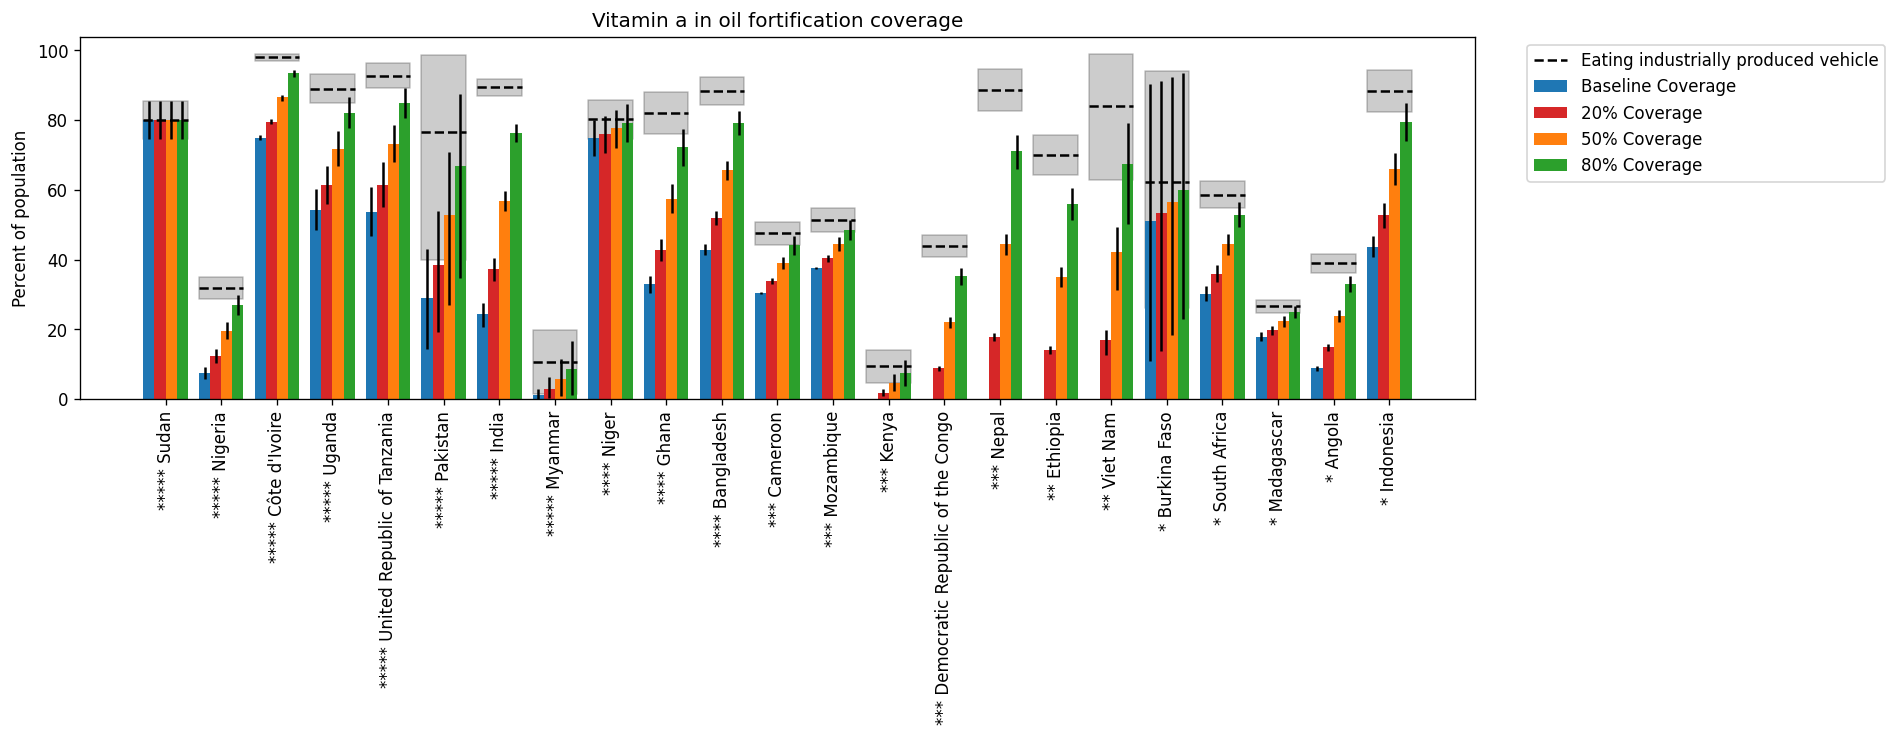

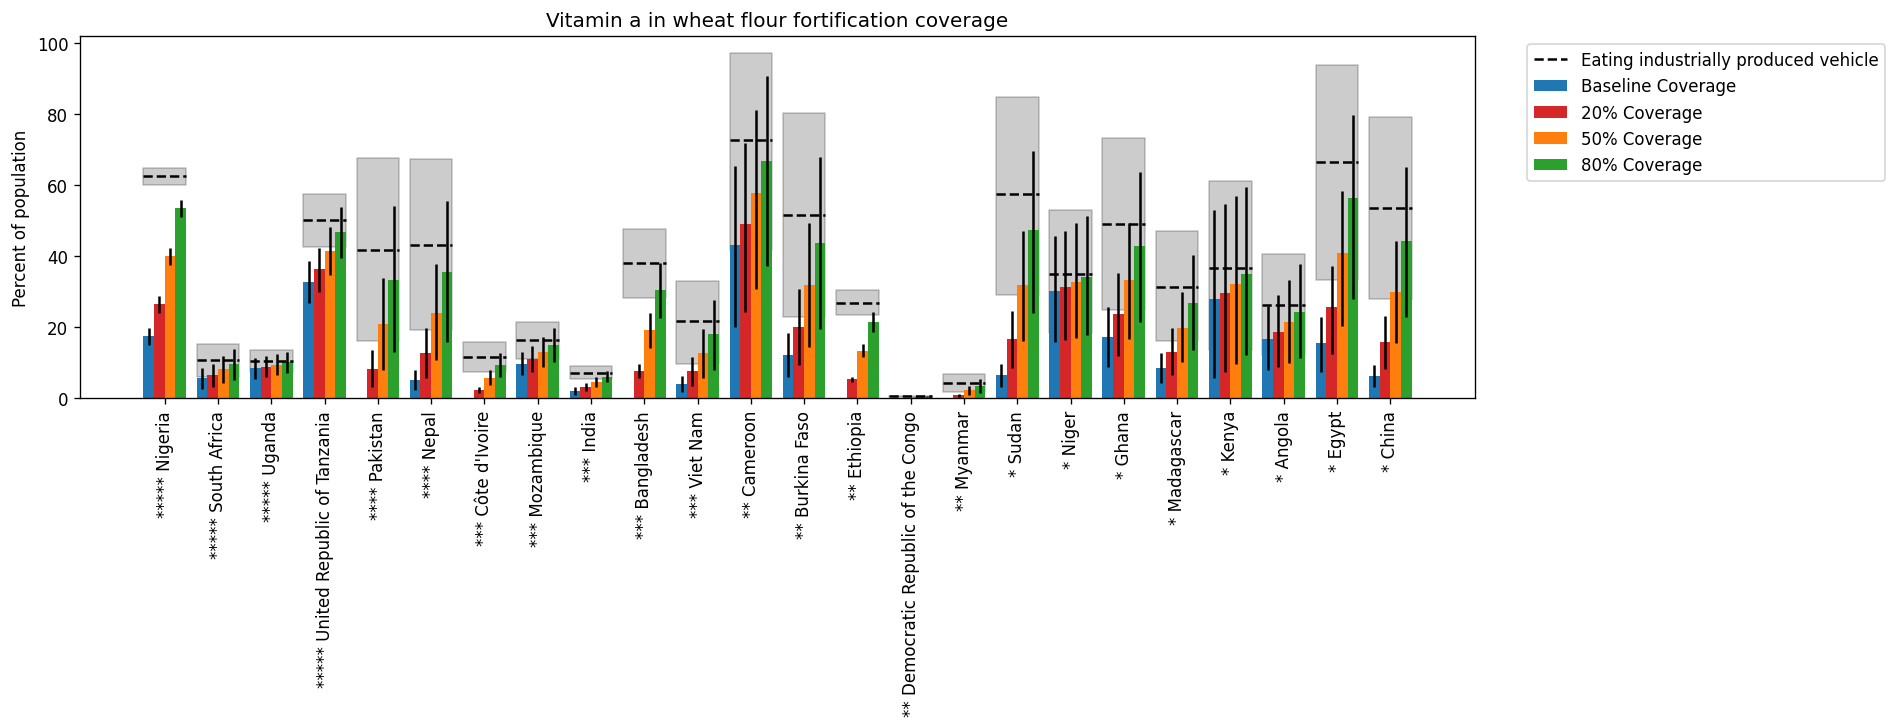

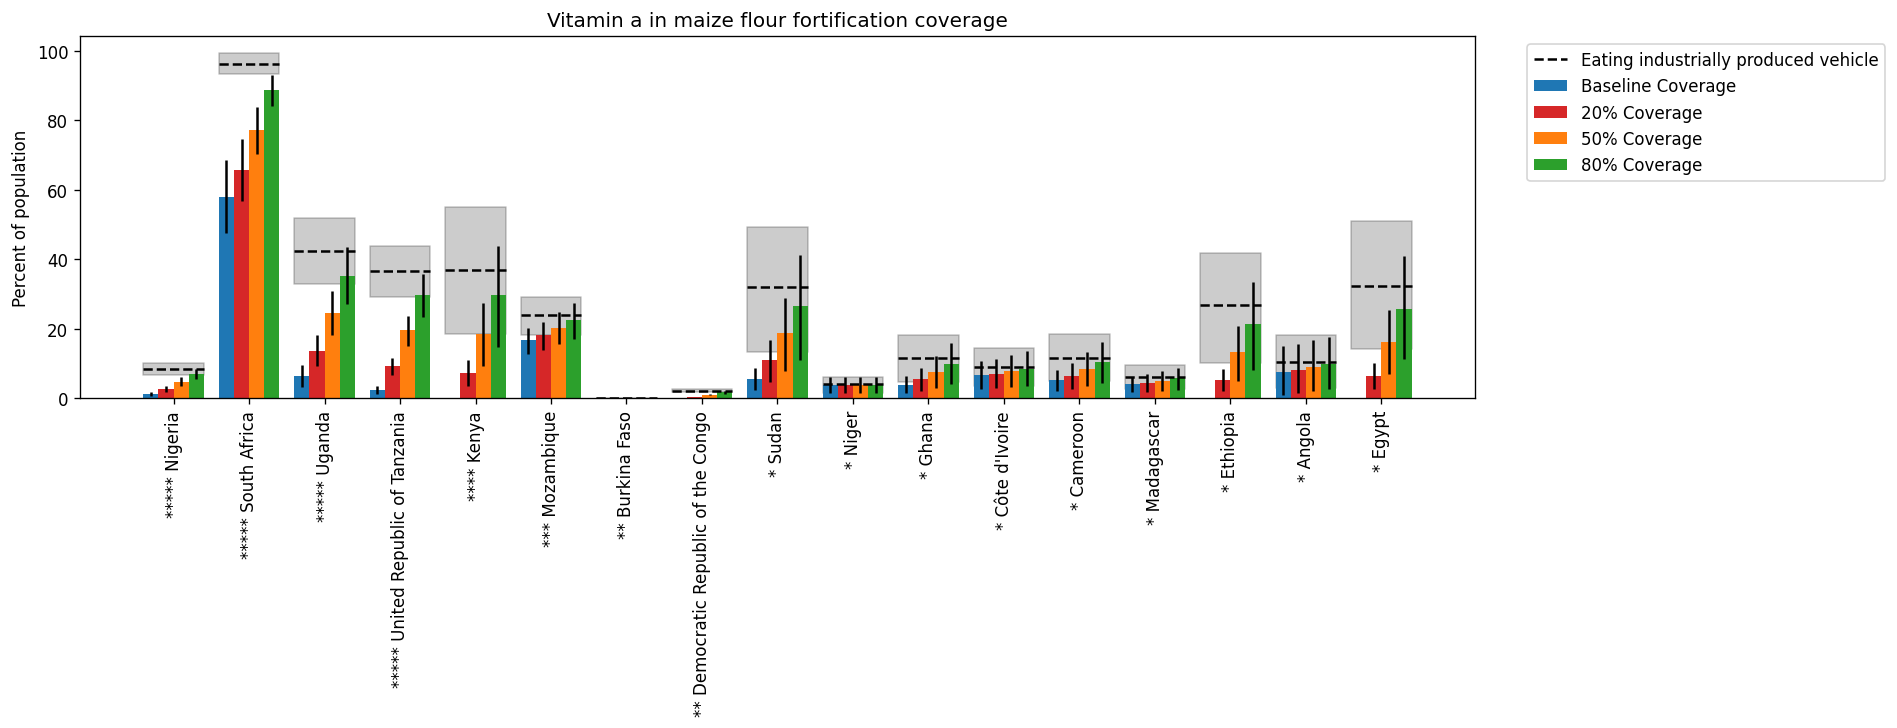

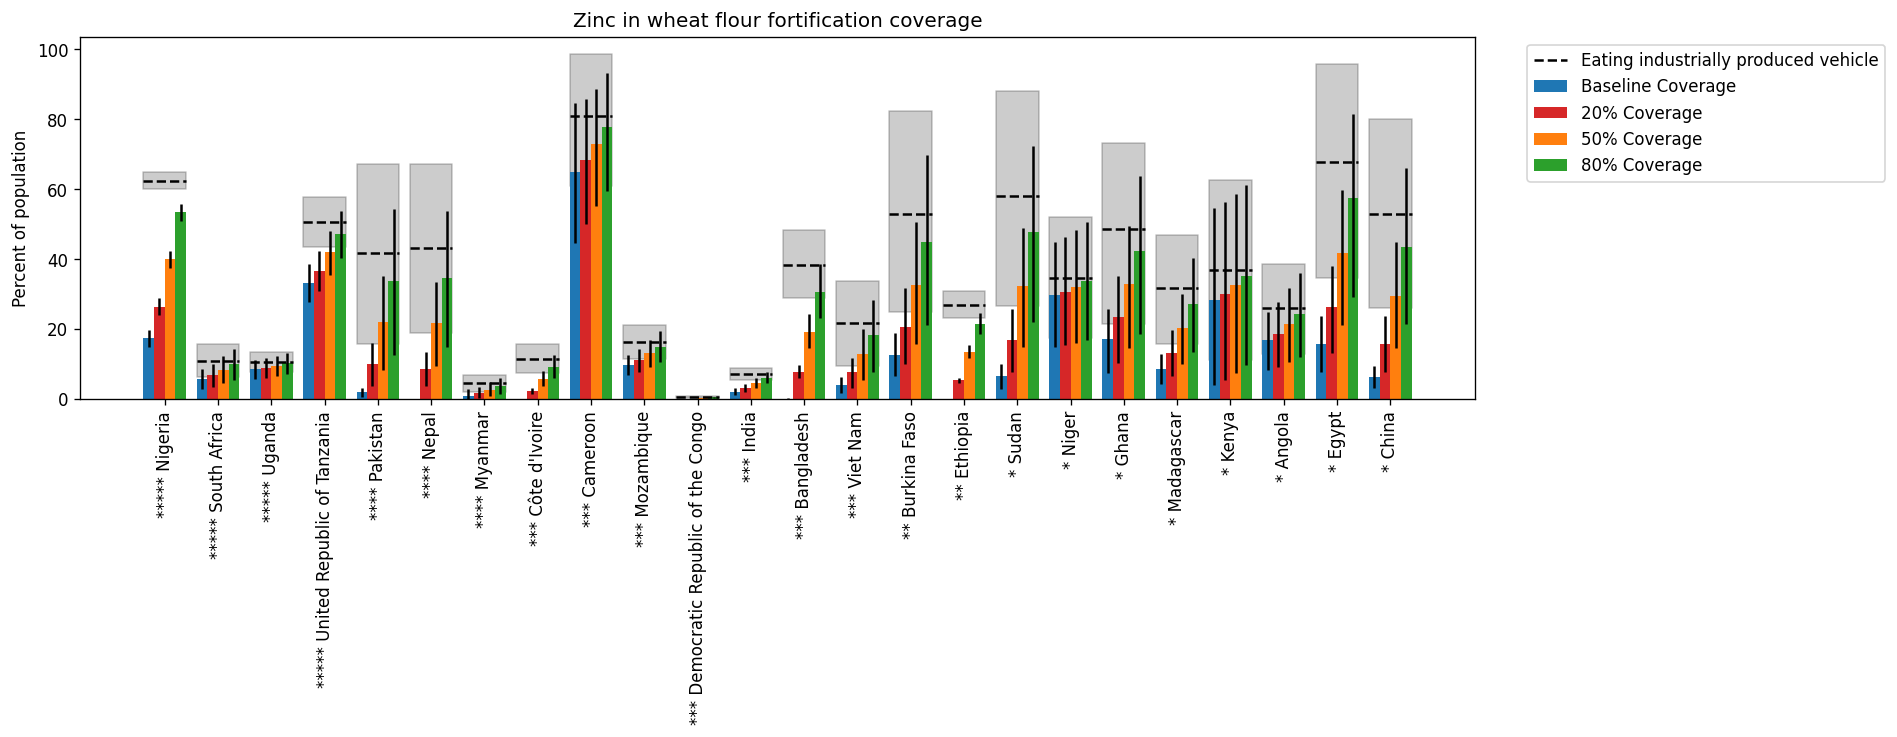

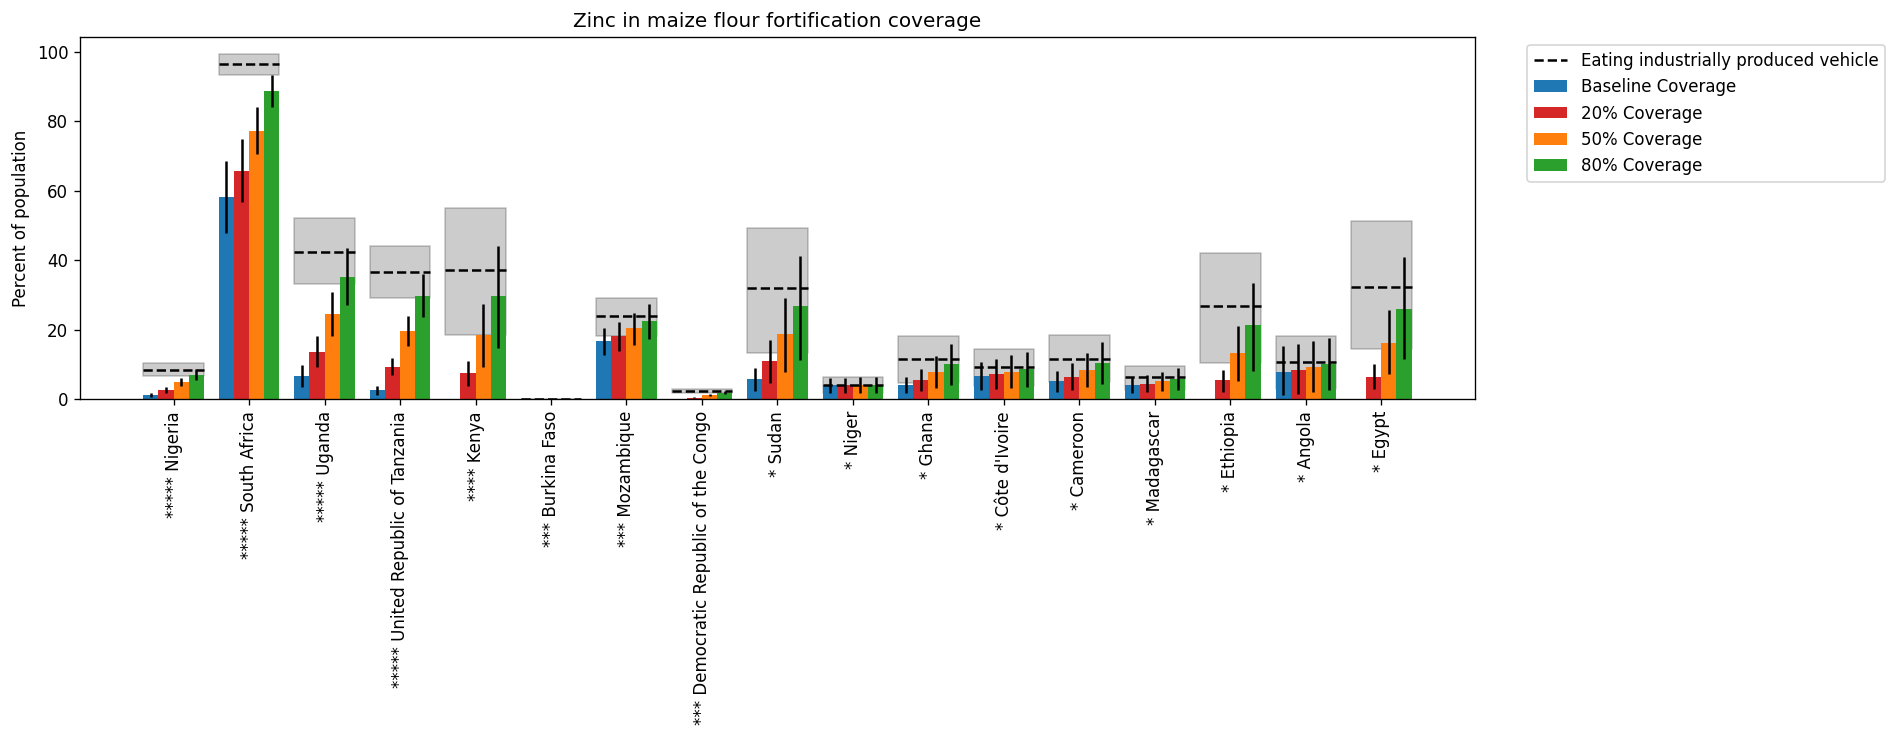

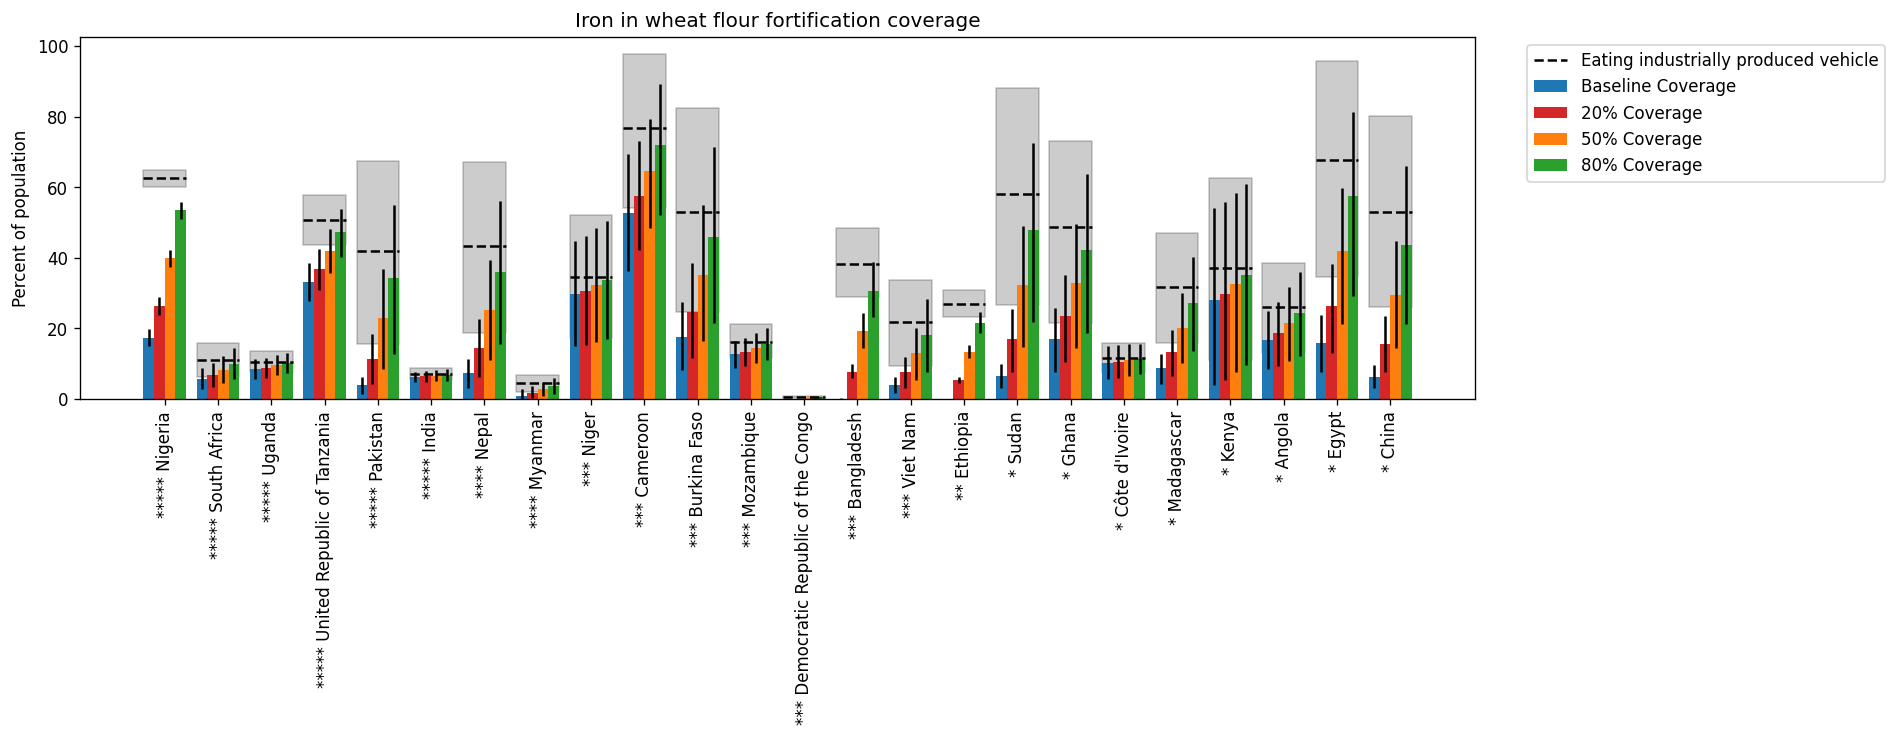

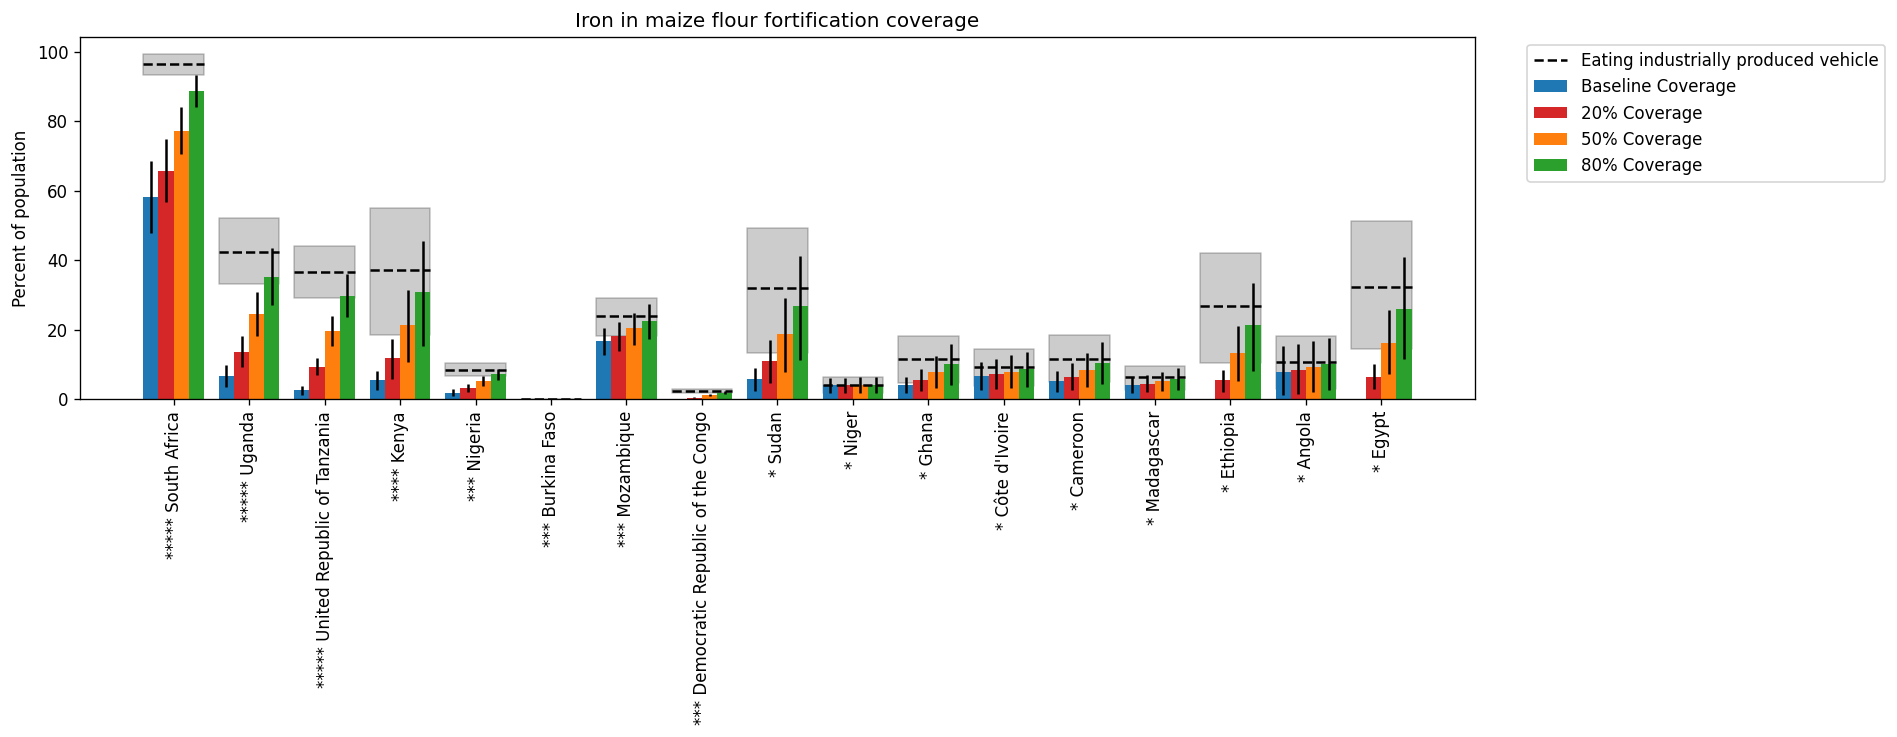

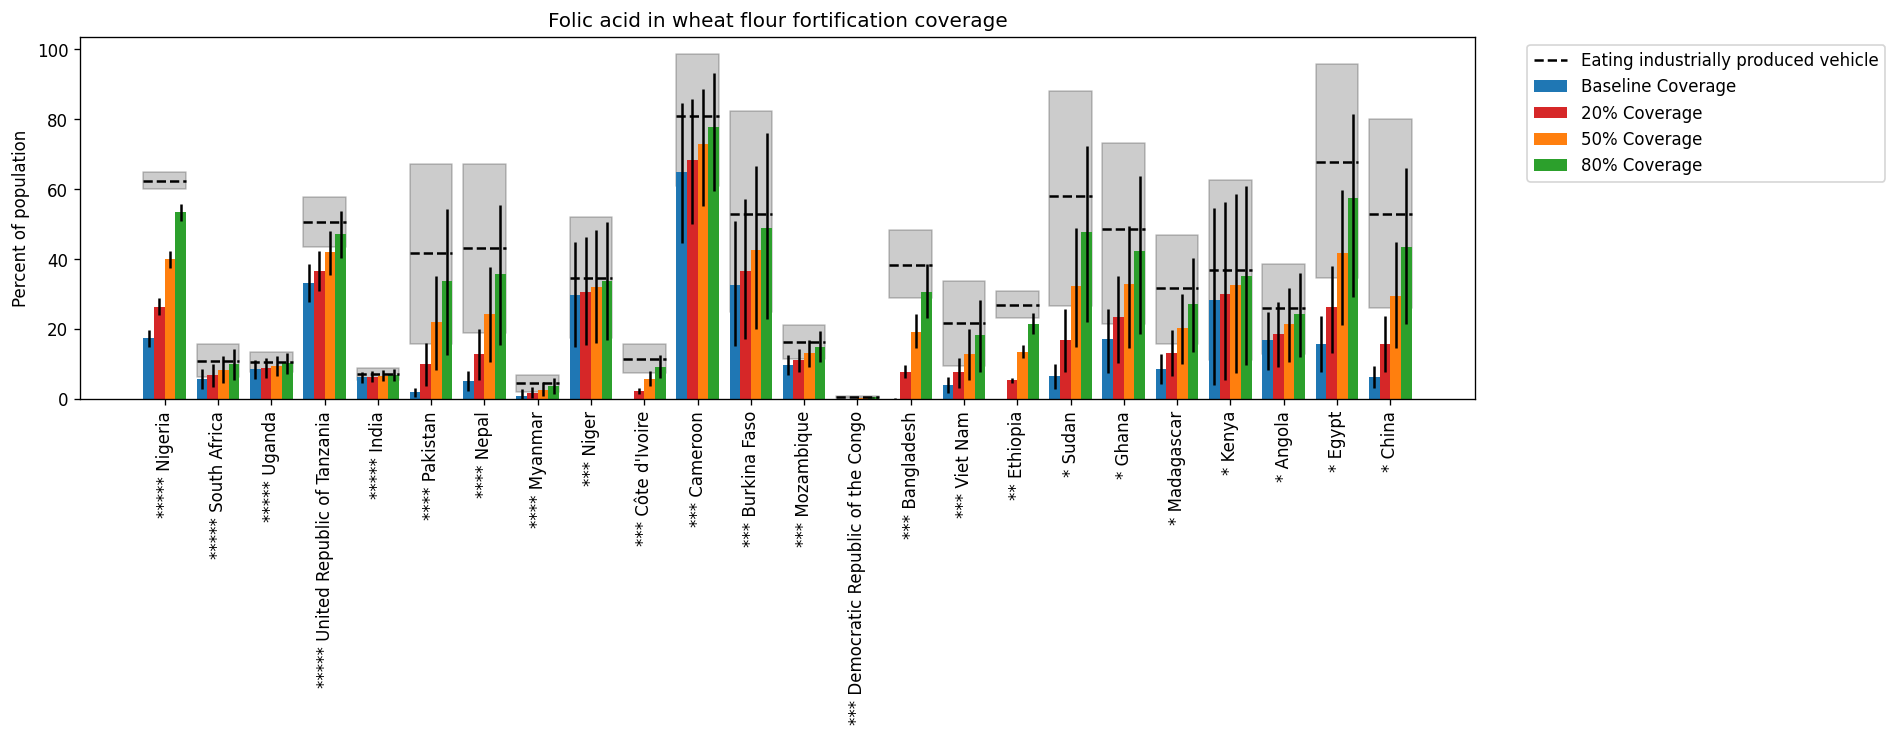

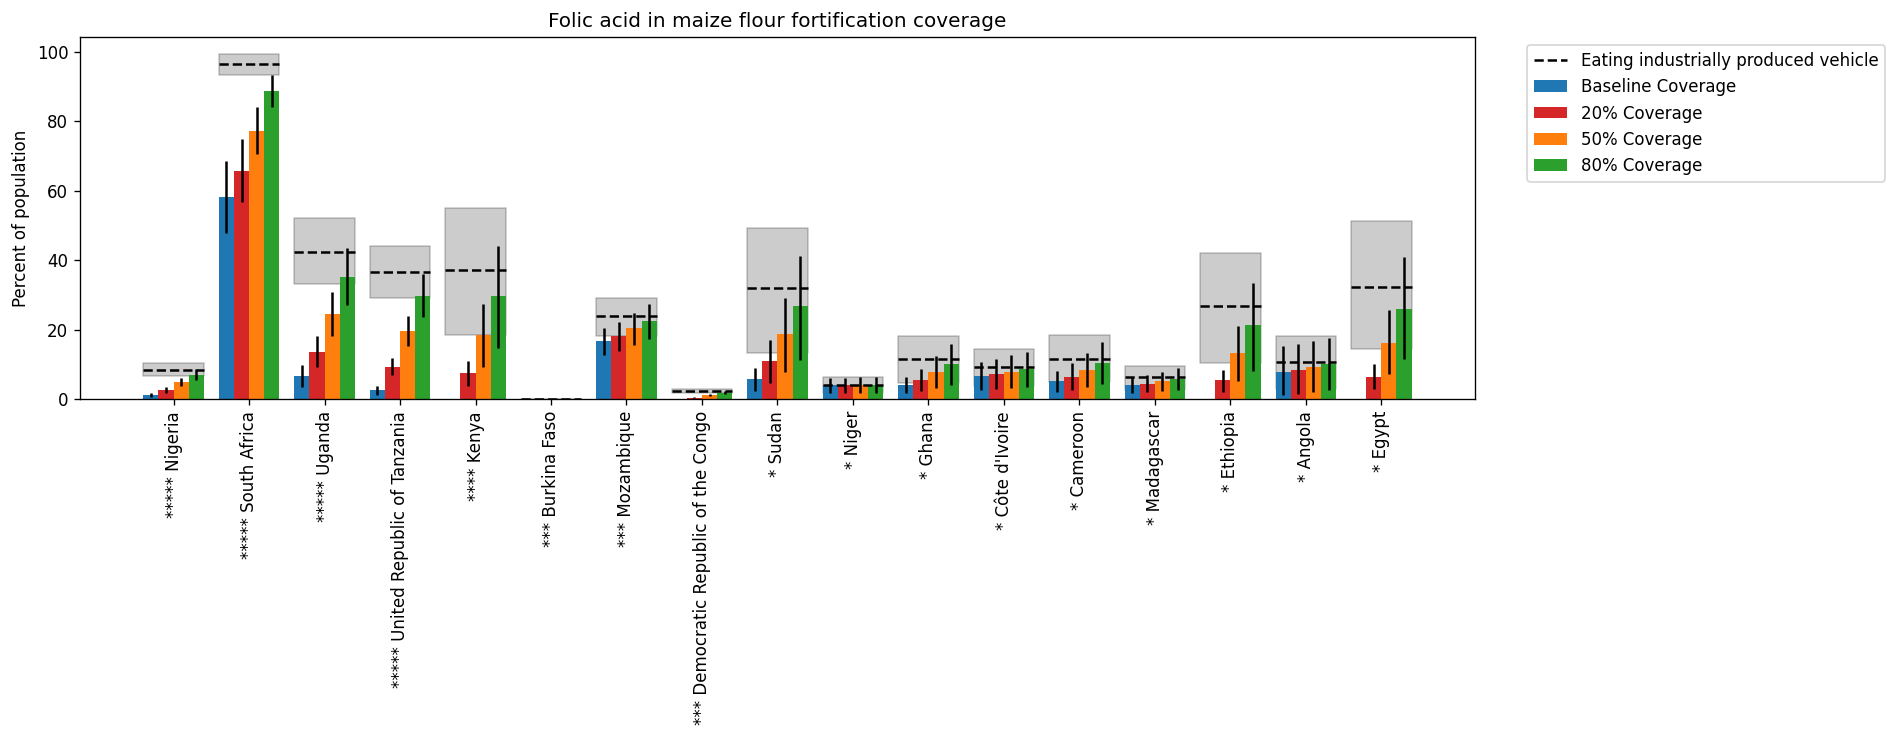

In [17]:
with PdfPages('results_plots/coverage_plots_u5.pdf') as pdf:
    for nutrient in nutrients:
        if nutrient == 'vitamin a':
            vehicles = ['oil','wheat flour','maize flour']
        else:
            vehicles = ['wheat flour', 'maize flour']
        for vehicle in vehicles:
            make_coverage_bar_charts(coverage_u5_summarized_with_confidence, location_ids, nutrient, vehicle)
            pdf.savefig(bbox_inches='tight')

In [18]:
with PdfPages('results_plots/coverage_plots_wra.pdf') as pdf:
    for nutrient in nutrients:
        if nutrient == 'vitamin a':
            vehicles = ['oil','wheat flour','maize flour']
        else:
            vehicles = ['wheat flour', 'maize flour']
        for vehicle in vehicles:
            make_coverage_bar_charts(coverage_wra_summarized_with_confidence, location_ids, nutrient, vehicle)
            pdf.savefig(bbox_inches='tight')

NameError: name 'coverage_wra_summarized_with_confidence' is not defined